In [1]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

from __future__ import print_function
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

In [7]:
def get_CIFAR10_data(num_training = 49000, num_validation = 1000, num_test = 1000, num_dev = 500):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the linear classifier. These are the same steps as we used for the SVM, but condensed to a single function"""
    
    # Load the raw CIFAR-10 DATA
    cifar10_dir = '/home/damvantai/Documents/data/cifar-10-batches-py'
    X_train, y_train, X_test , y_test = load_CIFAR10(cifar10_dir)
    
    # subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    mask = np.random.choice(num_training, num_dev, replace=False)
    X_dev = X_train[mask]
    y_dev = y_train[mask]
    
    # Preprocessing: reshape the image data into rows
    X_train = np.reshape(X_train, (X_train.shape[0], -1))
    X_val = np.reshape(X_val, (X_val.shape[0], -1))
    X_test = np.reshape(X_test, (X_test.shape[0], -1))
    X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))
    
    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis = 0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image
    X_dev -= mean_image
    
    # add bias dimension and transform into columns
    X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
    X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
    X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
    X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])
    
    return X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev


In [8]:
X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev = get_CIFAR10_data()

In [9]:
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)
print('dev data shape: ', X_dev.shape)
print('dev labels shape: ', y_dev.shape)

Train data shape:  (49000, 3073)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3073)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3073)
Test labels shape:  (1000,)
dev data shape:  (500, 3073)
dev labels shape:  (500,)


## Softmax Classifier

In [10]:
# First implement the naive softmax loss function with nested loops
# Open the file cs231n/classifiers/softmax.py and implement the
# softmax_loss_naive funtion
from cs231n.classifiers.softmax import softmax_loss_naive
import time

In [11]:
# Generate a random softmax weight matrix and use it to compute the loss
W = np.random.randn(3073, 10) * 0.0001
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 0.0)

In [12]:
print('loss: %f' % loss)
print('sanity check: %f' % (-np.log(0.1)))

loss: 2.311602
sanity check: 2.302585


In [13]:
# Complete the implementation of softmax_loss_naive and implement a (naive)
# version of the gradient that uses nested loops
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 0.0)

In [14]:
# As we didi for the SVM use numeric gradient checking as a debugging tool
# The numeric gradient should be close to the analytic gradient
from cs231n.gradient_check import grad_check_sparse
f = lambda w: softmax_loss_naive(w, X_dev, y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

numerical: 2.876892 analytic: 2.876892, relative error: 6.824528e-09
numerical: -0.767874 analytic: -0.767874, relative error: 1.320477e-08
numerical: 0.774509 analytic: 0.774509, relative error: 1.070781e-07
numerical: -0.247350 analytic: -0.247350, relative error: 1.308900e-07
numerical: -0.441254 analytic: -0.441254, relative error: 3.262912e-08
numerical: -1.869306 analytic: -1.869306, relative error: 4.310940e-08
numerical: -0.469131 analytic: -0.469131, relative error: 1.516681e-07
numerical: -0.120687 analytic: -0.120687, relative error: 3.889600e-07
numerical: -0.776748 analytic: -0.776749, relative error: 5.634863e-08
numerical: -1.184664 analytic: -1.184664, relative error: 2.870586e-08


In [15]:
# Gradient check with regularization
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 1e2)
f = lambda w: softmax_loss_naive(w, X_dev, y_dev, 1e2)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

numerical: 0.285906 analytic: 0.285906, relative error: 5.775835e-08
numerical: -3.824802 analytic: -3.824802, relative error: 2.585715e-09
numerical: -1.003879 analytic: -1.003879, relative error: 2.689676e-08
numerical: 0.329025 analytic: 0.329025, relative error: 4.820903e-08
numerical: -2.208332 analytic: -2.208332, relative error: 5.652642e-09
numerical: -1.452195 analytic: -1.452195, relative error: 1.357367e-08
numerical: -3.309267 analytic: -3.309267, relative error: 9.063762e-09
numerical: 0.204138 analytic: 0.204138, relative error: 4.019416e-07
numerical: -0.387209 analytic: -0.387209, relative error: 9.051090e-08
numerical: 0.562274 analytic: 0.562274, relative error: 7.698979e-08


In [16]:
# Now that we have a naive implementation of the softmax loss function and its gradient
# Implement a vectorized version in softmax loss vectorized
tic = time.time()
loss_naive, grad_naive = softmax_loss_naive(W, X_dev, y_dev, 0.000005)
toc = time.time()
print("naive loss: %e computed in %fs" % (loss_naive, toc - tic))

naive loss: 2.311602e+00 computed in 0.280003s


In [17]:
from cs231n.classifiers.softmax import softmax_loss_vectorized
tic = time.time()
loss_vectorized, grad_vectorized = softmax_loss_vectorized(W, X_dev, y_dev, 0.000005)
toc = time.time()
print("vectorized loss: %e computed in %fs" % (loss_vectorized, toc - tic))

vectorized loss: 2.311602e+00 computed in 0.010544s


In [18]:
# As we did for the SVM, we use the frobenius norm to compare the two versions
grad_difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('Loss difference: %f' % np.abs(loss_naive - loss_vectorized))
print('Gradien difference: %f' % grad_difference)

Loss difference: 0.000000
Gradien difference: 0.000000


In [20]:
# Use the validation set to tune hyperparameters (regularization strength and learning rate). You should experiment with difference 
# for the learning rate and regularization strengths
# If you are careful you should be able to get a classification acucracy of over 0.35 on the validation set
from cs231n.classifiers import Softmax
results = {}
best_val = -1
best_softmax = None
learning_rates = [1e-7, 5e-7]
regularization_strengths = [2.5e4, 5e4]

range_lr = np.linspace(learning_rates[0], learning_rates[1], 3)
range_reg = np.linspace(regularization_strengths[0], regularization_strengths[1], 3)

In [21]:
for cur_lr in range_lr:
    for cur_reg in range_reg:
        
        softmax = Softmax()
        softmax.train(X_train, y_train, learning_rate=cur_lr, reg=cur_reg, num_iters=500, verbose=False)
        y_train_pred = softmax.predict(X_train)
        train_acc = np.mean(y_train == y_train_pred)
        
        y_val_pred = softmax.predict(X_val)
        val_acc = np.mean(y_val == y_val_pred)
        
        results[(cur_lr, cur_reg)] = (train_acc, val_acc)
        
        # Store our results in a dict
        if val_acc > best_val:
            best_val = val_acc
            best_softmax = softmax
        

In [22]:
# Print out results:
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (lr, reg, train_accuracy, val_accuracy))

lr 1.000000e-07 reg 2.500000e+04 train accuracy: 0.314551 val accuracy: 0.323000
lr 1.000000e-07 reg 3.750000e+04 train accuracy: 0.318551 val accuracy: 0.332000
lr 1.000000e-07 reg 5.000000e+04 train accuracy: 0.306571 val accuracy: 0.319000
lr 3.000000e-07 reg 2.500000e+04 train accuracy: 0.324000 val accuracy: 0.337000
lr 3.000000e-07 reg 3.750000e+04 train accuracy: 0.305980 val accuracy: 0.317000
lr 3.000000e-07 reg 5.000000e+04 train accuracy: 0.308531 val accuracy: 0.328000
lr 5.000000e-07 reg 2.500000e+04 train accuracy: 0.335122 val accuracy: 0.347000
lr 5.000000e-07 reg 3.750000e+04 train accuracy: 0.303408 val accuracy: 0.309000
lr 5.000000e-07 reg 5.000000e+04 train accuracy: 0.318265 val accuracy: 0.331000


In [23]:
print('best accuracy validation achieved during cross-validation: %f' % best_val)

best accuracy validation achieved during cross-validation: 0.347000


In [24]:
# evaluate on test set
# evaluate the best softmax on test set
y_test_pred = best_softmax.predict(X_test)
test_accuracy = np.mean(y_test == y_test_pred)
print("softmax for accuracy in test set is: %f" % test_accuracy)

softmax for accuracy in test set is: 0.351000


In [25]:
# Visualize the learned weights for each class
w = best_softmax.W[:-1, :]
w = w.reshape(32, 32, 3, 10)
w_min, w_max = np.min(w), np.max(w)

In [26]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

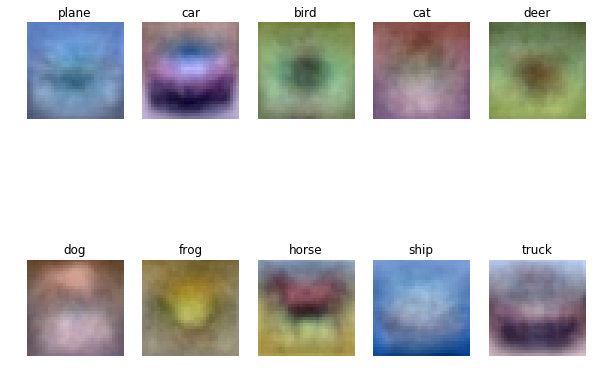

In [27]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    
    # Rescale the weights to be between 0 and 255
    wimg = 255.0 * (w[:, :, :, i].squeeze() - w_min) / (w_max - w_min)
    plt.imshow(wimg.astype('uint8'))
    plt.axis('off')
    plt.title(classes[i])